In [1]:
# ** CHEQUEAR QUÉ LIBRERIAS ESTOY Y NO ESTOY USANDO** 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import seaborn as sns


In [3]:
dust_file='Dust records uniformes e interpolados 16-05-22.xlsx'  #Base de datos sin valores repetidos, Uniforme
temp_file='Temps records interpolados 130k.xlsx' #Base de datos sin valores repetidos, No uniforme

id_columns=['Name','Data id','Latitud','Longitud','Age units','Data units']

#id_data=pd.read_excel(dust_file,sheet_name=0,usecols=id_columns)
id_data=pd.read_excel(temp_file,sheet_name=0,usecols=id_columns)
#id_data.head()

#df_data=pd.read_excel(dust_file,sheet_name=1,skiprows=1)
df_data=pd.read_excel(temp_file,sheet_name=1,skiprows=1)

df_data.head()

,Year,dB,Year.1,d18O,Year.2,deut,Year.3,delta-T,Year.4,Temp,...,Year.6,Temp.1,Year.7,d18O,Year.8,Temp.2,Year.9,Temp.3,Year.10,Temp.4
0,-0.045000,-199.075,-0.056900,-32.9898,4.509000,-432.700,0.5,0.4,0.035390,219.40,...,1.313000,24.450,0.02,-35.16,6.5,0.133170,6.5,0.236032,6.5,-0.029036
1,0.100437,-203.740,-0.023802,-34.7154,4.900962,-434.500,1.0,0.8,0.077416,217.60,...,1.663247,24.425,0.04,-35.82,6.6,0.138927,6.6,0.237451,6.6,-0.016437
2,0.245874,-203.610,0.009296,-33.9359,5.292925,-436.300,1.5,-0.2,0.119441,217.00,...,2.013494,24.400,0.06,-35.11,6.7,0.143500,6.7,0.247552,6.7,-0.020581
3,0.391311,-204.690,0.042395,-33.9408,5.684887,-438.370,2.0,-0.8,0.161467,217.45,...,2.363741,23.600,0.08,-34.65,6.8,0.161308,6.8,0.274253,6.8,-0.016798
4,0.536748,-206.200,0.075493,-33.9509,6.076850,-438.985,2.5,-0.4,0.203493,217.15,...,2.713988,23.650,0.10,-34.53,6.9,0.159509,6.9,0.272957,6.9,-0.019388


In [4]:
#SEPARAR CADA UNA DE LAS COLUMNAS v.2
columns=df_data.size/len(df_data)
lis=[] 
new_length=np.array([])

for i in range(int(columns)):
    if (i+1)%2==1: 
        dupla=df_data[[df_data.columns[i],df_data.columns[i+1]]].dropna()
        dupla.index=[j for j in range(0, len(dupla))]
        lis.append(dupla)
        new_length=np.append(new_length,np.shape(dupla)[0])

### Chequeo de distribución comparando gaussiana, log-gaussiana y otras (definir) con el histograma real de las muestras

In [5]:
#from scipy.stats import norm
import scipy.stats as stat
import statistics

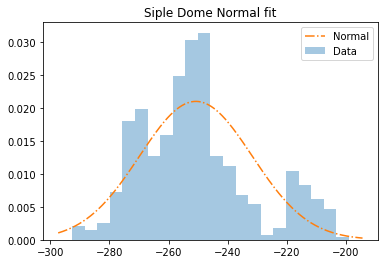

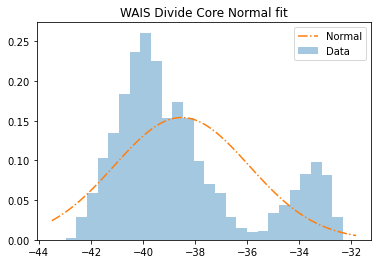

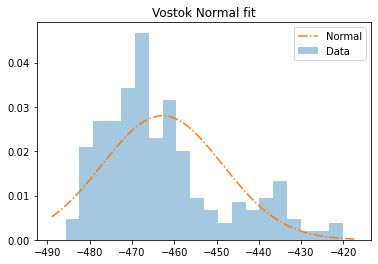

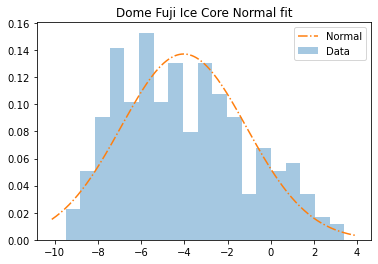

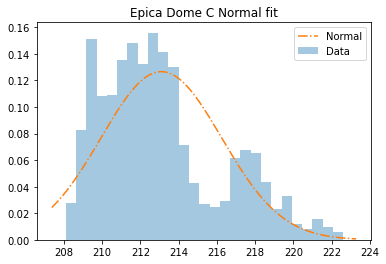

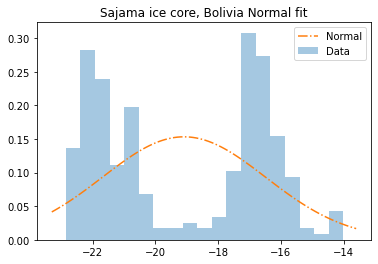

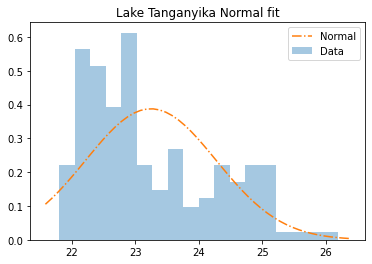

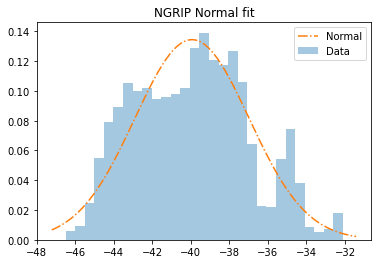

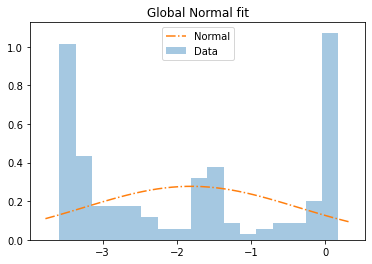

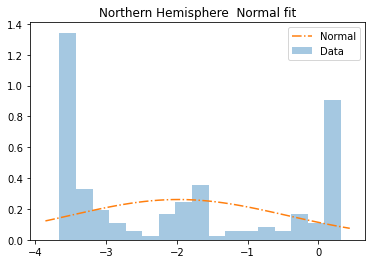

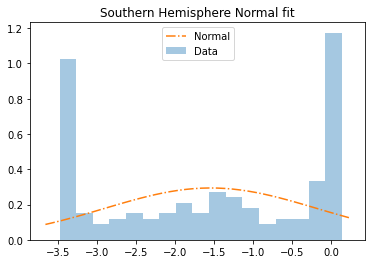

In [6]:
for i in range(len(lis)):
    data=lis[i][lis[i].columns[1]]
    mu, sd = stat.norm.fit(data)
    plt.hist(data, bins=int(1+3.322*np.log(len(data))), density=True, alpha=0.4,label='Data')#, color='b')    

    xmin, xmax = plt.xlim()
    x_axis = np.arange(xmin,xmax, 0.1)

    plt.plot(x_axis, stat.norm.pdf(x_axis, mu, sd),label='Normal',linestyle='-.')

    plt.title(id_data['Name'][i]+' Normal fit')
    plt.legend()
    plt.show()